# Практикум 3. Кластеризацiя засобами бiблiотеки Scikit-Learn Python

# Постановка завдання<br> Варіант 17
Агломеративний алгоритм AgglomerativeClustering. Дослiдити методи розрахунку вiдстанi мiж кластерами: ward, single, average, complete. Побудувати матрицi внутрiшньокласових вiдстаней, використовуючи metrics.pairwise_distances.

Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

Метрики якостi: Estimated number of clusters, Homogeneity, Completeness, V-measure.

Hierarchical clustering algorithms group similar objects into groups called clusters. <br>
Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.

In [1]:
import numpy as np

In [89]:
np.random.seed(0)
X1 = np.random.randn(300, 2)
Y1 = np.logical_xor(X1[:, 0] > 0 , X1[:, 1] > 0)
# rng = np.random.RandomState(42)
# flip = rng.randint(100, size=15)
# Y1[flip] = ~Y1[flip] #инвертировать (-x) - 1

from sklearn.datasets import make_moons
X2, Y2 = make_moons(n_samples=100, noise =0.2)

## 1. Представити початковi данi графiчно.

#### XOR Dataset

In [75]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

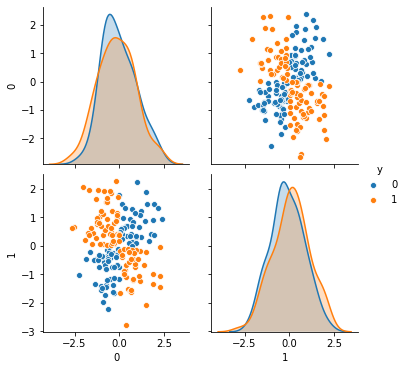

In [90]:
df1 = pd.DataFrame(X1)
df1['y'] = Y1.astype("int")

sns.pairplot(df1, hue='y')

#### make_moons

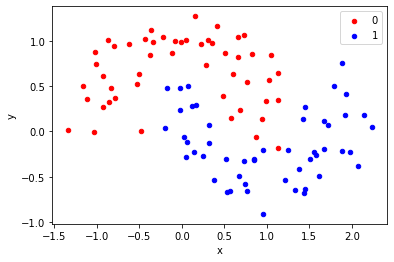

In [86]:
df2 = pd.DataFrame(dict(x=X2[:,0], y=X2[:,1], label=Y2))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

## 2.-4. Побудувати модель кластеризацiї згiдно з варiантом. Виконати кластеризацiю даних на основi моделi. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

In [6]:
from sklearn.cluster import AgglomerativeClustering

linkage{“ward”, “complete”, “average”, “single”}, default=”ward”

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

- ward minimizes the variance of the clusters being merged.

- average uses the average of the distances of each observation of the two sets.

- complete or maximum linkage uses the maximum distances between all observations of the two sets.

- single uses the minimum of the distances between all observations of the two sets.

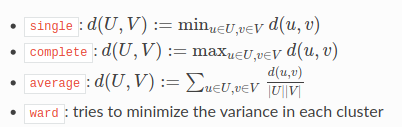


#### linkage ="ward"
The distance between clusters is the sum of squared differences within all clusters
![drawing](ward.png)

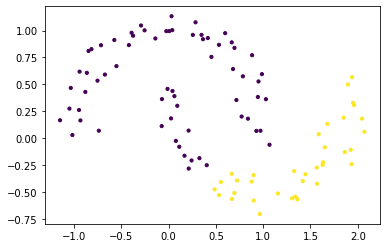

In [7]:
agg_clust = AgglomerativeClustering(n_clusters=2)
assigned_clust = agg_clust.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=assigned_clust, s=10)

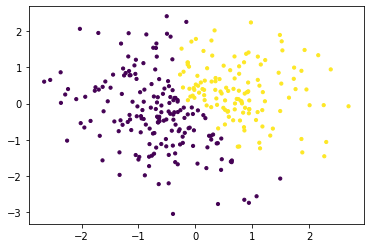

In [8]:
agg_clust = AgglomerativeClustering(n_clusters=2)
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)

#### linkage ="complete"
The distance between two clusters is the longest distance between two points in each cluster
![drawing](rcomplete.png)

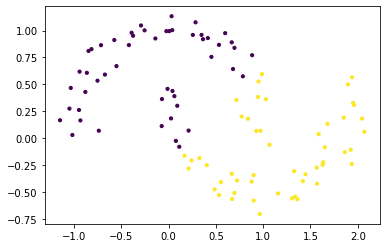

In [9]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=assigned_clust, s=10)

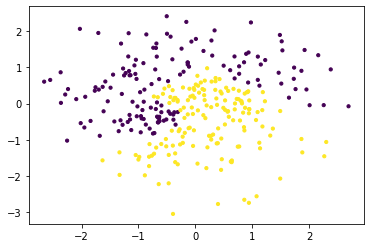

In [10]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)

#### linkage ="average"
The distance between clusters is the average distance between each point in one cluster to every point in other cluster
![drawing](raverage.png)

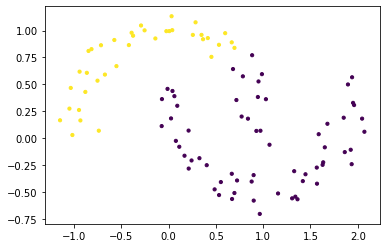

In [11]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="average")
assigned_clust = agg_clust.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=assigned_clust, s=10)

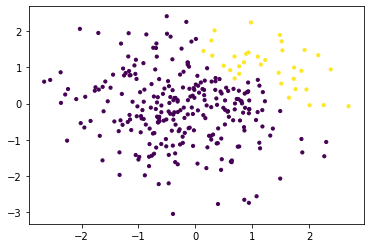

In [12]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="average")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)

#### linkage ="single"
The distance between two clusters is the shortest distance between two points in each cluster
![drawing](rsingle.png)

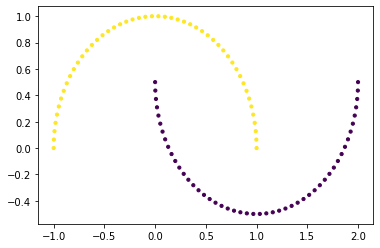

In [64]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="single")
assigned_clust = agg_clust.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=assigned_clust, s=10)

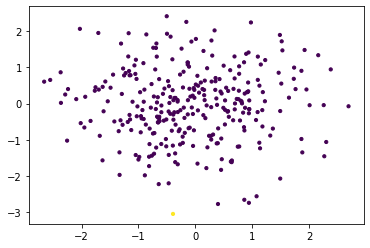

In [14]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="single")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)

Для make_moons найбільш ефективним розрахунком відстані є single, для xor - complete.

## 5. Розрахувати додатковi результати кластеризацiї згiдно з варiантом.

In [15]:
from sklearn.metrics import pairwise_distances

#### Матриця внутрiшньокласових вiдстаней для make_moons

In [16]:
dataf2 = pd.DataFrame(pairwise_distances(X2))
dataf2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,1.123844,1.832366,1.770773,1.590234,1.888931,0.211950,0.914110,1.787266,0.820441,...,0.753786,0.539984,0.763873,1.466324,1.366651,0.761338,1.206290,0.144534,0.830379,0.745801
1,1.123844,0.000000,2.956083,2.869712,2.698483,2.997193,1.293514,0.726741,2.895192,0.584242,...,1.757495,1.276643,1.129027,2.558469,2.445087,0.368116,0.313335,1.012284,1.713063,1.484872
2,1.832366,2.956083,0.000000,0.453831,0.470519,0.359811,1.678289,2.590740,0.356614,2.569354,...,1.356584,1.867822,2.196071,0.658007,0.786815,2.593030,3.017521,1.948044,1.579795,1.798419
3,1.770773,2.869712,0.453831,0.000000,0.829323,0.159977,1.659555,2.408506,0.098296,2.417166,...,1.147907,1.674809,1.977048,0.978482,1.077638,2.521458,2.977034,1.862275,1.731837,1.556299
4,1.590234,2.698483,0.470519,0.829323,0.000000,0.794720,1.405584,2.437041,0.750112,2.385030,...,1.306406,1.756941,2.096968,0.194545,0.331913,2.330420,2.718514,1.722703,1.173207,1.746722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.761338,0.368116,2.593030,2.521458,2.330420,2.644864,0.925772,0.644951,2.542941,0.467274,...,1.432104,0.989350,0.923338,2.190624,2.077960,0.000000,0.481073,0.659191,1.363254,1.213631
96,1.206290,0.313335,3.017521,2.977034,2.718514,3.094303,1.339533,1.013870,2.992813,0.854390,...,1.908241,1.469507,1.375822,2.563461,2.440941,0.481073,0.000000,1.123079,1.650650,1.691765
97,0.144534,1.012284,1.948044,1.862275,1.722703,1.986514,0.356377,0.769823,1.884544,0.677189,...,0.793786,0.475680,0.648230,1.603698,1.506694,0.659191,1.123079,0.000000,0.966561,0.700139
98,0.830379,1.713063,1.579795,1.731837,1.173207,1.789032,0.632670,1.722814,1.701873,1.601379,...,1.217466,1.308825,1.585105,0.989038,0.852338,1.363254,1.650650,0.966561,0.000000,1.456326


#### Матриця внутрiшньокласових вiдстаней для XOR

In [17]:
dataf1 = pd.DataFrame(pairwise_distances(X1))
dataf1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,2.001257,1.381319,0.983212,1.867300,1.932767,1.040957,1.321862,0.662791,1.917943,...,3.864103,2.929239,2.476507,1.981518,4.065369,1.221360,2.477393,1.412427,2.317690,2.755668
1,2.001257,0.000000,3.338656,2.392422,2.126172,1.146946,2.130371,1.980802,2.499749,3.165766,...,4.123425,2.570596,3.114905,2.157195,5.461936,1.853715,3.534265,1.964394,2.852868,3.081846
2,1.381319,3.338656,0.000000,1.234462,2.410428,2.980427,1.559514,1.935330,0.857703,1.559363,...,3.832527,3.485641,2.474293,2.523720,3.063913,1.938967,2.089828,2.034136,2.458203,2.909486
3,0.983212,2.392422,1.234462,0.000000,1.193839,1.796596,0.332095,0.701085,0.546645,0.948492,...,2.946114,2.290050,1.537906,1.310759,3.190929,0.716965,1.495969,0.799688,1.421625,1.880442
4,1.867300,2.126172,2.410428,1.193839,0.000000,1.072565,0.911272,0.552464,1.711875,1.331445,...,2.136169,1.102112,0.989980,0.118934,3.468816,0.647156,1.499155,0.456079,0.726702,1.015366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.221360,1.853715,1.938967,0.716965,0.647156,1.090921,0.384873,0.144888,1.148457,1.313476,...,2.726401,1.718293,1.425585,0.760288,3.608609,0.000000,1.703442,0.200652,1.207024,1.597679
296,2.477393,3.534265,2.089828,1.495969,1.499155,2.564218,1.554116,1.565251,1.925856,0.580125,...,1.783433,2.083272,0.698805,1.529432,1.969705,1.703442,0.000000,1.570851,0.902754,1.151004
297,1.412427,1.964394,2.034136,0.799688,0.456079,1.094925,0.483559,0.102738,1.283107,1.233939,...,2.527110,1.545778,1.242289,0.572565,3.505283,0.200652,1.570851,0.000000,1.015162,1.398045
298,2.317690,2.852868,2.458203,1.421625,0.726702,1.780266,1.276736,1.066842,1.964146,1.009693,...,1.546621,1.204978,0.267527,0.708844,2.830477,1.207024,0.902754,1.015162,0.000000,0.461702


## 6. Побудувати декiлька альтернативних моделей:
- шляхом змiни значень параметрiв основної моделi,
- використати рiзнi функцiї вiдстанi,
- задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть кластерiв - параметр.

### make_moons, linkage ="complete", n_samples=1000, noise=0.5

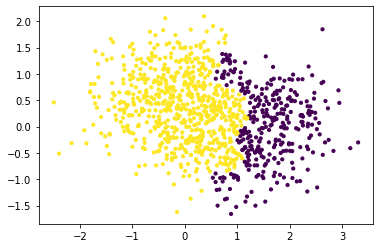

In [18]:
X2_1, Y2_1 = make_moons(n_samples=1000, noise=0.5)
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X2_1)
plt.scatter(X2_1[:, 0], X2_1[:, 1], c=assigned_clust, s=10)

### XOR, n_clusters=3, linkage ="complete"

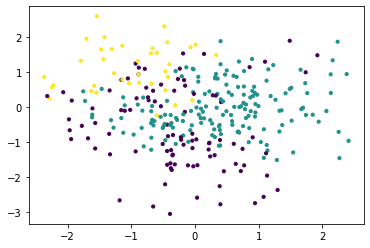

In [19]:
np.random.seed(0)
X1_1 = np.random.randn(300, 3)
Y1_1 = np.logical_xor(X1_1[:, 0] > 0 , X1_1[:, 1] > 0)

agg_clust = AgglomerativeClustering(n_clusters=3, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X1_1)
plt.scatter(X1_1[:, 0], X1_1[:, 1], c=assigned_clust, s=10)

## 7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї: Estimated number of clusters, Homogeneity, Completeness, V-measure.

- homogeneity: each cluster contains only members of a single class.
- completeness: all members of a given class are assigned to the same cluster.
- V-Measure: the harmonic mean of homogeneity h and completeness c of the clustering.

In [20]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [21]:
def metric(true_labels, labels):
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % homogeneity_score(true_labels, labels))
    print("Completeness: %0.3f" % completeness_score(true_labels, labels))
    print("V-measure: %0.3f" % v_measure_score(true_labels, labels))

#### make_moons, linkage ="complete", n_samples=1000, noise=0.5

In [22]:
metric(Y2_1, agg_clust.fit(X2_1).labels_)

Estimated number of clusters: 3
Homogeneity: 0.153
Completeness: 0.127
V-measure: 0.139


#### XOR, n_clusters=3, linkage ="average"

In [146]:
metric(Y1_1, agg_clust.fit(X1_1).labels_)

Estimated number of clusters: 3
Homogeneity: 0.080
Completeness: 0.058
V-measure: 0.067


## 8. Виконати аналiз результатiв кластеризацiї. Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

#### make_moons, linkage ="complete", n_samples=1000, noise=0.5

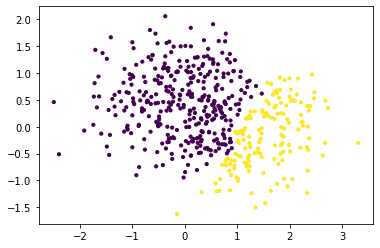

In [147]:
idx_not_to_delete = np.array([x for x in range(len(X2_1))])
np.random.shuffle(idx_not_to_delete)
idx_not_to_delete = idx_not_to_delete[500:]
idx_not_to_delete
X2_2 = X2_1[idx_not_to_delete]

agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X2_2)
plt.scatter(X2_2[:, 0], X2_2[:, 1], c=assigned_clust, s=10)

#### XOR, n_clusters=3, linkage ="complete"

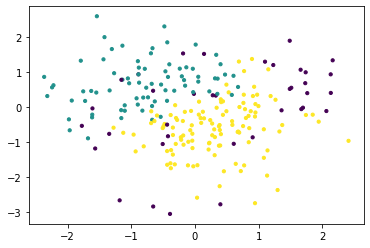

In [148]:
idx_not_to_delete = np.array([x for x in range(len(X1_1))])
np.random.shuffle(idx_not_to_delete)
idx_not_to_delete = idx_not_to_delete[70:]
idx_not_to_delete
X1_2 = X1_1[idx_not_to_delete]

agg_clust = AgglomerativeClustering(n_clusters=3, linkage ="complete")
assigned_clust = agg_clust.fit_predict(X1_2)
plt.scatter(X1_2[:, 0], X1_2[:, 1], c=assigned_clust, s=10);

Розбиття не є стабiльним пiсля вилучення окремих об’єктiв, бо як ми бачимо з графіків, розбиття змінилось.

## 9. Зробити висновки про якiсть роботи моделей на дослiджених даних. Дослiдити рiзнi значення параметрiв основної моделi, рiзнi функцiї вiдстанi та рiзну кiлькiсть кластерiв в алгоритмах, де кiлькiсть кластерiв слугує параметром. 

### Виконаємо решітчатий пошук, для знаходження оптимальних параметрів моделі.

v_measure:  score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling



In [52]:
num = [1, 2, 3, 4]
linkage = ["complete", "average", "single"]
affinity = ["euclidean", "l1", "l2", "manhattan", "cosine"]

In [53]:
def grid_search(X, labels_true):
    param=[]
    esimated_cluster_num = []
    v_measure = []
    for n in num:
        for link in linkage:
            for aff in affinity:
                agg_clust = AgglomerativeClustering(n_clusters = n, linkage = link, affinity = aff).fit(X)
                param.append([n, link, aff])
                labels = agg_clust.labels_
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
                esimated_cluster_num.append(n_clusters_)
                v_measure.append(v_measure_score(labels_true, labels))
            
    return pd.DataFrame({"params[n, linkage]": param, "v_measure_score": v_measure})

#### make_moons dataset

In [88]:
agg_clust2 = grid_search(X2, Y2).set_index("params[n, linkage]")
pd.options.display.float_format = '{:.6f}'.format
agg_clust2_sort = agg_clust2.sort_values(["v_measure_score"], ascending=False)
agg_clust2_sort.head()

,v_measure_score
"params[n, linkage]",
"[2, average, manhattan]",0.550886
"[2, average, l1]",0.550886
"[3, average, manhattan]",0.499461
"[3, average, l1]",0.499461
"[2, complete, cosine]",0.458950


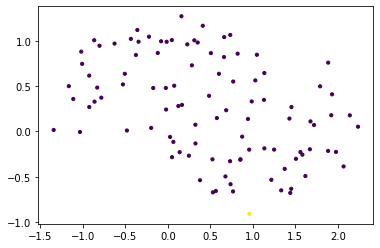

In [87]:
agg_clust = AgglomerativeClustering(n_clusters=2, linkage ="single")
assigned_clust = agg_clust.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=assigned_clust, s=10)

#### XOR dataset

In [56]:
agg_clust1 = grid_search(X1, Y1).set_index("params[n, linkage]")
pd.options.display.float_format = '{:.6f}'.format
agg_clust1_sort = agg_clust1.sort_values(["v_measure_score"], ascending=False)
agg_clust1_sort.head()

,v_measure_score
"params[n, linkage]",
"[4, average, cosine]",0.482194
"[3, average, cosine]",0.319437
"[4, complete, cosine]",0.251344
"[4, average, l2]",0.190266
"[4, average, euclidean]",0.190266


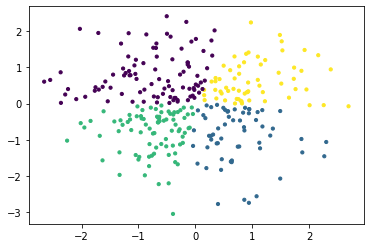

In [82]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "cosine")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)

## 10. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. Для кожного набору даних вибрати найкращу модель.

### 1. Найкращі параметри для AgglomerativeClustering:

#### Датасет make_moons
n_clusters=2, linkage ="single"

#### XOR датасет
n_clusters=4, linkage ="average"

### 2. Вилучення окремих об’єктiв у датасеті, впливає на якість кластеризації.

### 3. Висновок
Я обирала найкращу модель завдяки метриці V-Measure
![drawing](vm.png)
h - homogeneity
c - completeness<br>
Чим більше ця метрика, тим краща модель. Здійснивши решітчатий пошук можна зробити висновок про те які параметри є оптимальними. З графіків видно, що це дійсно так.

Text(0.5, 1.0, 'euclidean')

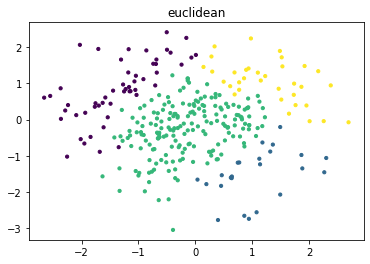

In [41]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "euclidean")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)
plt.title('euclidean')

Text(0.5, 1.0, 'l1')

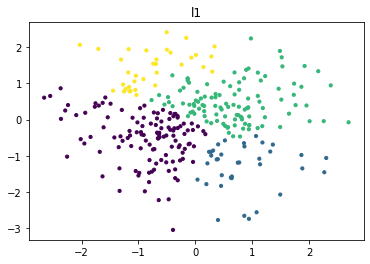

In [43]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "l1")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)
plt.title('l1')

Text(0.5, 1.0, 'l2')

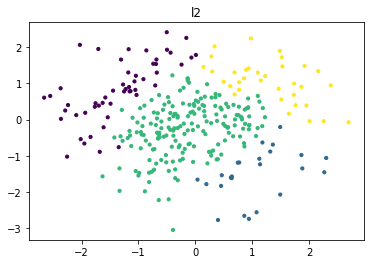

In [44]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "l2")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)
plt.title('l2')

Text(0.5, 1.0, 'manhattan')

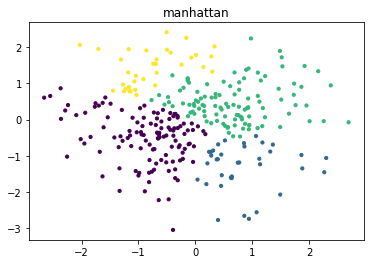

In [45]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "manhattan")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)
plt.title('manhattan')

Text(0.5, 1.0, 'cosine')

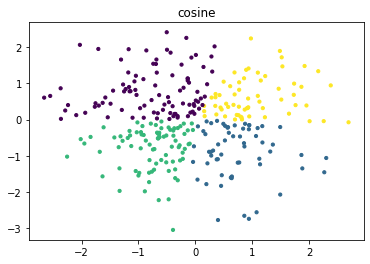

In [46]:
agg_clust = AgglomerativeClustering(n_clusters=4, linkage ="average", affinity = "cosine")
assigned_clust = agg_clust.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=assigned_clust, s=10)
plt.title('cosine')

IndexError: index 2 is out of bounds for axis 1 with size 2